In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import sklearn as skl
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pydotplus

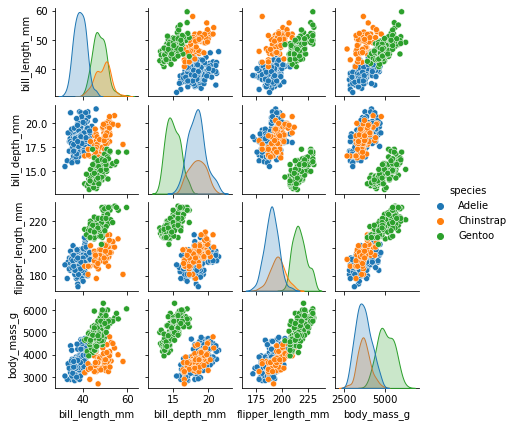

In [2]:
# Load the penguins dataset
df = pd.read_csv("penguins.csv")

# Replace infinity values with NaN
df = df.replace([np.inf, -np.inf], np.nan)

# Remove rows with missing values or impute the missing values
df = df.dropna()
penguins = sns.load_dataset('penguins') #seaborn has some built in datasets
penguins.head()
sns.pairplot(penguins, hue='species', height=1.5, dropna = True);

In [3]:
# 2. Train your model using 80% of the data set as your training set. 

In [4]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

# Or
# imputer = SimpleImputer(strategy='mean')
# imputer.fit(df)
# df = imputer.transform(df)

# Select the feature columns
X = df[['flipper_length_mm', 'bill_length_mm']]
y = df['species']

# Compute mutual information between features and target variable
mi = mutual_info_classif(X, y)

# Print mutual information values for each feature
print("Mutual information:", mi)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gaussian Naive Bayes classifier on the top 2 features
gnb = GaussianNB()
gnb.fit(X_train, y_train)
# Print the accuracy of the classifier on the test set
acc = gnb.score(X_test, y_test)
print("Accuracy:", acc)

Mutual information: [0.58704996 0.53137373]
Accuracy: 0.9850746268656716


In [5]:
#3. Use a filled contour plot to show the decision distribution of your model (limit your plot axes to the actual data boundaries +-1).

C:\Users\Yuval\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


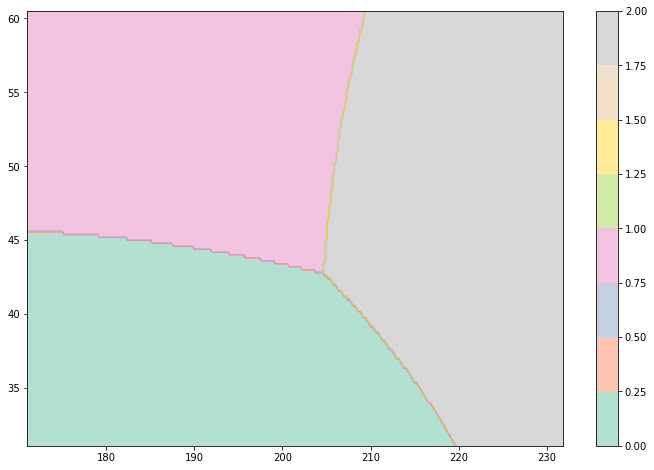

In [6]:
import numpy as np

y_pred = gnb.predict(X_test)
hueorder = gnb.classes_

x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.2),
    np.arange(y_min, y_max, 0.2)
)

colors = "Set2"
plt.contourf(xx, yy, np.argmax(gnb.predict_proba(np.c_[xx.ravel(), yy.ravel()]), axis=1).reshape(xx.shape), cmap=colors, alpha=0.5, zorder=1)
plt.colorbar()

fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

In [7]:
#4. Overlay a scatter plot containing only the points from the original data set that would have had incorrect predictions given this model above the filled contour plot.

C:\Users\Yuval\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


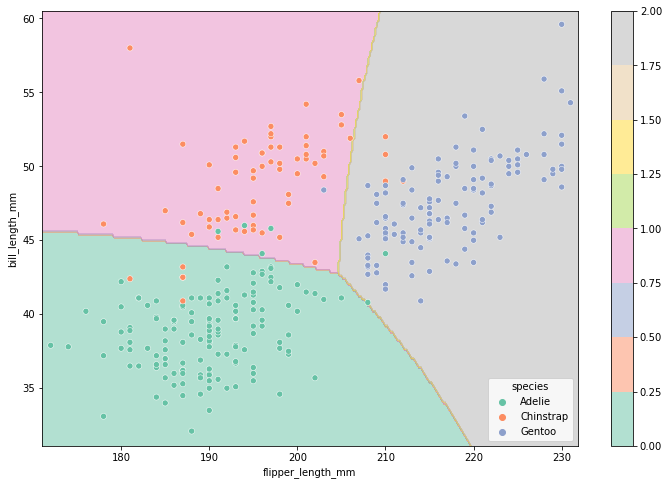

In [8]:
import numpy as np

y_pred = gnb.predict(X_test)
hueorder = gnb.classes_

x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.2),
    np.arange(y_min, y_max, 0.2)
)

colors = "Set2"
plt.contourf(xx, yy, np.argmax(gnb.predict_proba(np.c_[xx.ravel(), yy.ravel()]), axis=1).reshape(xx.shape), cmap=colors, alpha=0.5, zorder=1)
plt.colorbar()
# Create a scatter plot of the data points
sns.scatterplot(data=df, x="flipper_length_mm", y="bill_length_mm", hue=y, hue_order=hueorder, palette=colors, zorder=2)

fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

In [9]:
#5. Include the classification report for your model with regards to the test set.

In [10]:
from sklearn.metrics import classification_report

y_pred = gnb.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
Adelie,0.968750,1.000000,0.984127,31.000000
Chinstrap,1.000000,0.923077,0.960000,13.000000
Gentoo,1.000000,1.000000,1.000000,23.000000
accuracy,0.985075,0.985075,0.985075,0.985075
macro avg,0.989583,0.974359,0.981376,67.000000
weighted avg,0.985541,0.985075,0.984895,67.000000


In [11]:
# ********NOTICE I ALSO DID IT WITH THE OTHER TWO FEATURES*********
#i decided to do the same thing with the other 2 features because they also had a very nice correlation 
# bill_depth_mm and bill_length_mm

In [12]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

# Load the penguins dataset
df = pd.read_csv("penguins.csv")

# Replace infinity values with NaN
df = df.replace([np.inf, -np.inf], np.nan)

# Remove rows with missing values or impute the missing values
df = df.dropna()
# Or
# imputer = SimpleImputer(strategy='mean')
# imputer.fit(df)
# df = imputer.transform(df)

# Select the feature columns
X = df[['body_mass_g', 'flipper_length_mm', 'bill_depth_mm', 'bill_length_mm']].values
y = df['species'].values

# Compute mutual information between features and target variable
mi = mutual_info_classif(X, y)

# Print mutual information values for each feature
print("Mutual information:", mi)

# Select top 2 features with highest mutual information
top_2_features = np.argsort(mi)[-2:]
print("Top 2 features:", top_2_features)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X[:, top_2_features], y, test_size=0.2)

# Train a Gaussian Naive Bayes classifier on the top 2 features
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Print the accuracy of the classifier on the test set
acc = gnb.score(X_test, y_test)
print("Accuracy:", acc)

Mutual information: [0.50829811 0.62158621 0.56787882 0.54940733]
Top 2 features: [2 1]
Accuracy: 0.8208955223880597


In [13]:
from sklearn.preprocessing import LabelEncoder
X_penguins = df[['bill_depth_mm','bill_length_mm']]
X_penguins.columns = ["bill_depth_mm","bill_length_mm"] # setting the feature names
y_penguins = df['species']

#Encoding the categorical variable
encoder = LabelEncoder()
y_penguins = encoder.fit_transform(y_penguins)

C:\Users\Yuval\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


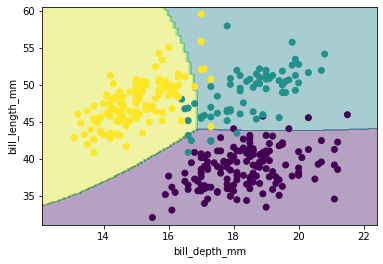

In [14]:
#2. Train your model using 80% of the data set as your training set.
X_train, X_test, y_train, y_test = train_test_split(X_penguins, y_penguins, test_size=0.2, random_state=1)
model = GaussianNB() # 2. instantiate model
model.fit(X_train, y_train) # 3. fit model to data
y_model = model.predict(X_test) # 4. predict on new data (output is numpy array)
x_min, x_max = X_penguins['bill_depth_mm'].min()-1, X_penguins['bill_depth_mm'].max()+1
y_min, y_max = X_penguins['bill_length_mm'].min()-1, X_penguins['bill_length_mm'].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_penguins.iloc[:, 0], X_penguins.iloc[:, 1], c=y_penguins, alpha=1)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('bill_depth_mm')
plt.ylabel('bill_length_mm')
plt.show()

In [15]:
# Task2

In [16]:
# 1. Create a new column named “class” in the data set which is a combination of the “sex” and “species” category, e.g. Male Adelie, Female Chinstrap, etc…

In [17]:
penguins2 = df.copy()
penguins2["class"] = penguins2.apply(lambda row: row["sex"] + " " + row["species"], axis=1)
penguins2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,class
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,Male Adelie
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,Female Adelie
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,Female Adelie
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,Female Adelie
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,Male Adelie
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,Female Gentoo
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,Female Gentoo
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,Male Gentoo
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,Female Gentoo


In [18]:
# Task 2 
#2. Repeat task 1 using “class” as your target class. 

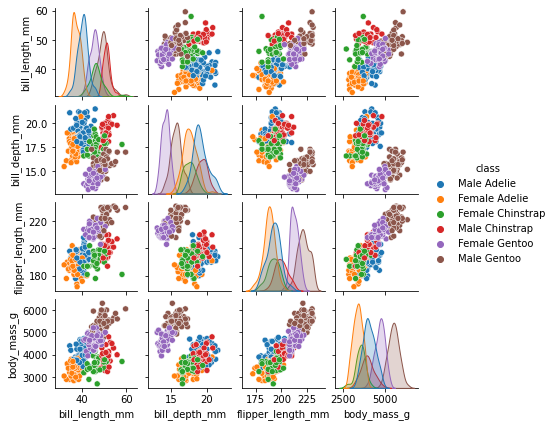

In [19]:
X = penguins2[["flipper_length_mm", "bill_length_mm"]]
y = penguins2["class"]
sns.pairplot(penguins2, hue='class', height=1.5, dropna = True);

In [20]:
# Task 2 
# 1. Create a new column named “class” in the data set which is a combination of the “sex” and  “species” category, e.g. Male Adelie, Female Chinstrap, etc… 


In [21]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

# Or
# imputer = SimpleImputer(strategy='mean')
# imputer.fit(df)
# df = imputer.transform(df)

# Compute mutual information between features and target variable
mi = mutual_info_classif(X, y)

# Print mutual information values for each feature
print("Mutual information:", mi)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gaussian Naive Bayes classifier on the top 2 features
gnb = GaussianNB()
gnb.fit(X_train, y_train)
# Print the accuracy of the classifier on the test set
acc = gnb.score(X_test, y_test)
print("Accuracy:", acc)

Mutual information: [0.8086027  0.86078202]
Accuracy: 0.7910447761194029


In [22]:
# 5. Include the classification report for your model with regards to the test set. 

C:\Users\Yuval\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


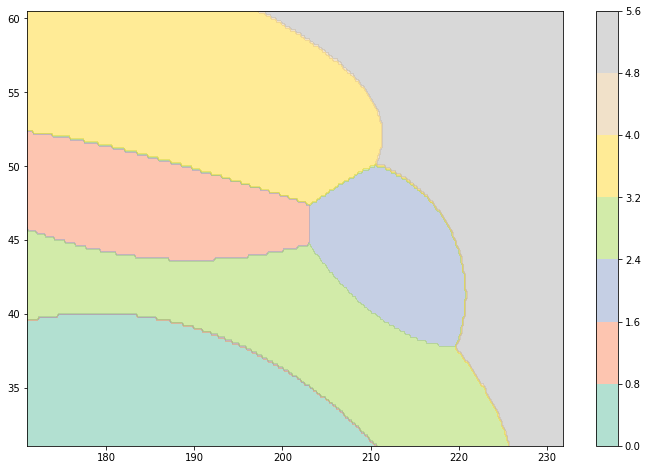

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the test data
y_pred = gnb.predict(X_test)

# Get the order of the classes
hueorder = gnb.classes_

# Set the range for the plotting grid
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))

# Choose colors for the plot
colors = "Set2"

# Create a contour plot with the predictions
plt.contourf(xx, yy, np.argmax(gnb.predict_proba(np.c_[xx.ravel(), yy.ravel()]), axis=1).reshape(xx.shape), cmap=colors, alpha=0.5, zorder=1)
plt.colorbar()

# Set the size of the plot
fig = plt.gcf()
fig.set_size_inches(12, 8)

# Show the plot
plt.show()


C:\Users\Yuval\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


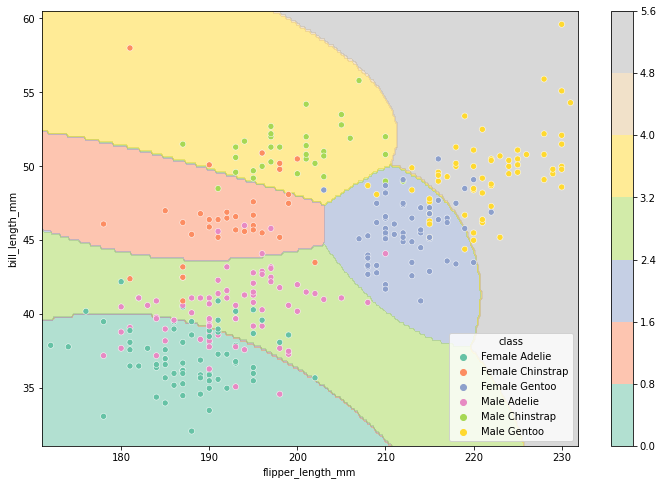

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the test data
y_pred = gnb.predict(X_test)

# Get the order of the classes
hueorder = gnb.classes_

# Set the range for the plotting grid
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))

# Choose colors for the plot
colors = "Set2"

# Create a contour plot with the predictions
plt.contourf(xx, yy, np.argmax(gnb.predict_proba(np.c_[xx.ravel(), yy.ravel()]), axis=1).reshape(xx.shape), cmap=colors, alpha=0.5, zorder=1)
plt.colorbar()
# Create a scatter plot with the actual data
sns.scatterplot(data=penguins2[::], x="flipper_length_mm", y="bill_length_mm", hue=y, hue_order=hueorder, palette=colors, zorder=2)

# Set the size of the plot
fig = plt.gcf()
fig.set_size_inches(12, 8)

# Show the plot
plt.show()


In [25]:
from sklearn.metrics import classification_report

y_pred = gnb.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
Female Adelie,0.789474,0.833333,0.810811,18.000000
Female Chinstrap,1.000000,0.428571,0.600000,7.000000
Female Gentoo,0.909091,0.833333,0.869565,12.000000
Male Adelie,0.692308,0.692308,0.692308,13.000000
Male Chinstrap,0.666667,1.000000,0.800000,6.000000
Male Gentoo,0.833333,0.909091,0.869565,11.000000
accuracy,0.791045,0.791045,0.791045,0.791045
macro avg,0.815145,0.782773,0.773708,67.000000
weighted avg,0.810243,0.791045,0.784994,67.000000
